### <p style="text-align: center;">Tu będą wykonywane modele stan XD</p>

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import mstats

import pandas as pd
import numpy as np
from os.path import join as JoinPath
from enum import Enum
from typing import List
from copy import deepcopy

In [2]:
electricity_household = pd.read_csv('electricity_household' + '.tsv',
                                    sep='\t',header=0,)
mean_list = list(electricity_household.mean())

<ipython-input-2-e4e20567d1fc>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_list = list(electricity_household.mean())


In [3]:
x = list(range(len(mean_list)))

In [4]:
model_1_fit=CmdStanModel(stan_file=JoinPath('stan-files', 'model_1.stan'))
fit_result = model_1_fit.sample(data=dict(
    N=len(mean_list),
    x=x,
    y=mean_list
), seed=2137)

INFO:cmdstanpy:compiling stan file /home/mat_komp/PycharmProjects/Projekt-DataAnalytics-2022/Source_Code/stan-files/model_1.stan to exe file /home/mat_komp/PycharmProjects/Projekt-DataAnalytics-2022/Source_Code/stan-files/model_1
INFO:cmdstanpy:compiled model executable: /home/mat_komp/PycharmProjects/Projekt-DataAnalytics-2022/Source_Code/stan-files/model_1
INFO:cmdstanpy:CmdStan start processing
Widget Javascript not detected.  It may not be installed or enabled properly.


ERROR:cmdstanpy:Error in progress bar initialization:
	'FloatProgress' object has no attribute 'style'
Disabling progress bars for this session


INFO:cmdstanpy:CmdStan done processing.


In [5]:
fit_result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,220.0000,0.032000,1.20000,220.000,220.0000,220.0000,1500.0,4500.0,1.0
alpha,0.1200,0.000110,0.00470,0.120,0.1200,0.1300,1700.0,5300.0,1.0
beta,0.0012,0.000003,0.00012,0.001,0.0012,0.0014,1700.0,5300.0,1.0
sigma,0.0200,0.000040,0.00180,0.017,0.0200,0.0230,2000.0,6100.0,1.0
y_sim[1],0.1200,0.000330,0.02000,0.091,0.1200,0.1600,3686.0,11412.0,1.0
...,...,...,...,...,...,...,...,...,...
y_sim[64],0.2000,0.000320,0.02000,0.170,0.2000,0.2300,3969.0,12288.0,1.0
y_sim[65],0.2000,0.000340,0.02100,0.170,0.2000,0.2400,3700.0,11455.0,1.0
y_sim[66],0.2000,0.000320,0.02000,0.170,0.2000,0.2400,3979.0,12319.0,1.0


In [6]:
alpha = np.mean(fit_result.stan_variable("alpha"))
beta = np.mean(fit_result.stan_variable("beta"))
sigma = np.mean(fit_result.stan_variable("sigma"))
y_sim_to_mean = fit_result.stan_variable("y_sim")

In [7]:
y_sim = []
for i in range(len(x)):
    y_sim.append(y_sim_to_mean[2,i])

In [8]:
upper_dev = [alpha + beta * x_ + sigma for x_ in x]
lower_dev = [alpha + beta * x_ - sigma for x_ in x]
dev = [alpha + beta * x_ for x_ in x]

Exception ignored in: <function tqdm.__del__ at 0x7f18b4612e50>
Traceback (most recent call last):
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 160, in display
    d = self.format_dict
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/std.py", line 1476, in format_dict
    'colour': self.colour}
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 203, in colour
    return self.container.children[-2].style.bar_color
AttributeError: 'FloatProgress' object has no attribute 'style'


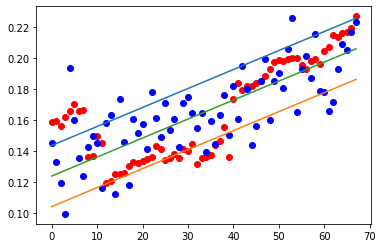

In [9]:
plt.plot(x, mean_list, "ro")
plt.plot(x, y_sim, "bo")
plt.plot(x, upper_dev)
plt.plot(x, lower_dev)
plt.plot(x, dev)
plt.show()